<a href="https://colab.research.google.com/github/arunmozhidevan/MDS271-Machine-Learning/blob/main/LAB_1_Getting_Familiar_with_Machine_Learning_Libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 1 - Getting Familiar with Machine Learning Libraries

## 1. Download the 80-cereals dataset from https://www.kaggle.com/crawford/80-cereals

In [4]:
!pip install opendatasets

In [5]:
import opendatasets as od

In [6]:
od.download("https://www.kaggle.com/crawford/80-cereals")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: arunmozhidevan
Your Kaggle Key: ··········


100%|██████████| 2.24k/2.24k [00:00<00:00, 817kB/s]

## 2. Load the dataset using pd.read_csv method

In [7]:
import pandas as pd

In [8]:
data = pd.read_csv('/content/80-cereals/cereal.csv')

In [9]:
data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [63]:
data.iloc[:,3:-1]

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75
73,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00
74,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67
75,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00


## 3. 
* a. In the column "mfr", replace the column "K" as "Kellogg's", "G" as "Nestle" and all other values as "Other Brands"
* b. In the column "type", replace "C" with "Type 1" and "H" with "Type 2"

In [11]:
data['mfr'].unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [76]:
{'K':"Kellogg's", 'G':"Nestle", ('N', 'Q', 'R', 'P', 'A'):"Other Brands"}

{('N', 'Q', 'R', 'P', 'A'): 'Other Brands', 'G': 'Nestle', 'K': "Kellogg's"}

In [15]:
data['mfr'] = data['mfr'].map({'N':"Other Brands", 'Q':"Other Brands", 'K':"Kellogg's", 'R':"Other Brands", 'G':"Nestle", 'P':"Other Brands", 'A':"Other Brands"})

In [16]:
data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Other Brands,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Other Brands,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kellogg's,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kellogg's,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,Other Brands,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,Nestle,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,Nestle,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,Other Brands,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,Nestle,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


## 4. Visualise the count of above two features "mfr" and "type" with a bar-plot

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

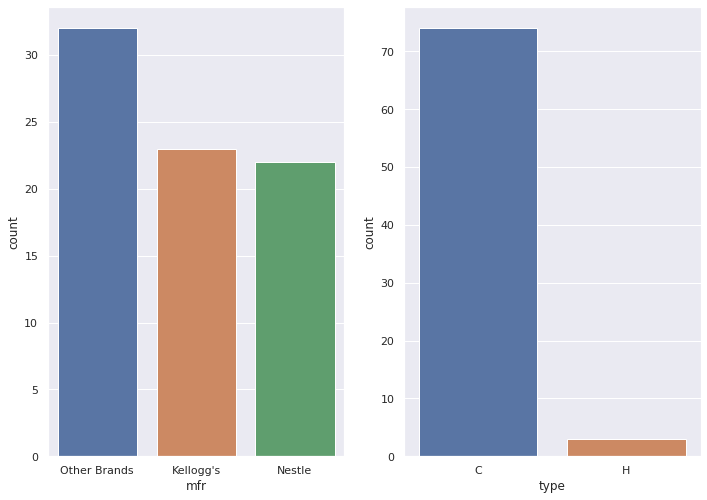

In [35]:
f, ax = plt.subplots(1,2)
sns.countplot(x='mfr',data=data, orient='v', ax=ax[0])
sns.countplot(x='type',data=data, orient='v', ax=ax[1])

## 5. Describe the five-number summary and boxplots of the features - protien, sugars, fat, carbo

In [37]:
data.describe()[['protein', 'sugars', 'fat', 'carbo']]

,protein,sugars,fat,carbo
count,77.000000,77.000000,77.000000,77.000000
mean,2.545455,6.922078,1.012987,14.597403
std,1.094790,4.444885,1.006473,4.278956
min,1.000000,-1.000000,0.000000,-1.000000
25%,2.000000,3.000000,0.000000,12.000000
50%,3.000000,7.000000,1.000000,14.000000
75%,3.000000,11.000000,2.000000,17.000000
max,6.000000,15.000000,5.000000,23.000000


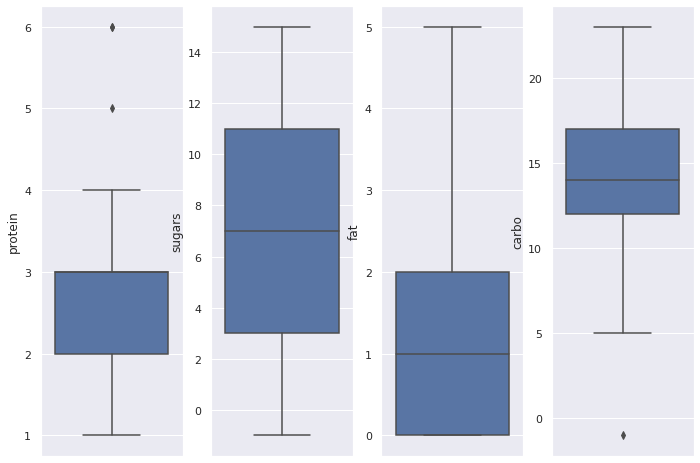

In [48]:
f, ax = plt.subplots(1,4)
sns.boxplot(y='protein', data=data, ax=ax[0])
sns.boxplot(y='sugars', data=data, ax=ax[1])
sns.boxplot(y='fat', data=data, ax=ax[2])
sns.boxplot(y='carbo', data=data, ax=ax[3])

## 6. Plot Histograms for the features - fat, carbo, sodium, fiber

Text(0.5, 1.0, 'carbo')

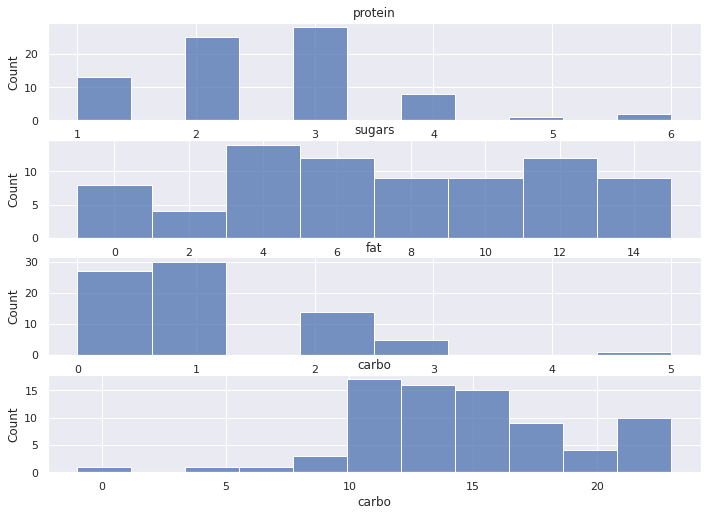

In [57]:
f, ax = plt.subplots(4,1)
sns.histplot(x='protein', data=data, ax=ax[0])
ax[0].set_title("protein")
sns.histplot(x='sugars', data=data, ax=ax[1])
ax[1].set_title("sugars")
sns.histplot(x='fat', data=data, ax=ax[2])
ax[2].set_title("fat")
sns.histplot(x='carbo', data=data, ax=ax[3])
ax[3].set_title("carbo")

## 7. Split the datasets into following ratios: 60:40, 70:30, 80:20. Write down what happens when you give "random_state" parameter with a constant value and what happens if you do not mention the parameter at all.

In [58]:
from sklearn.model_selection import train_test_split

In [73]:
# for 60:40
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,3:-1],data.iloc[:,-1],test_size=.4)
print(f'train: {len(X_train)/len(data)} test: {len(X_test)/len(data)}')

train: 0.5974025974025974 test: 0.4025974025974026


In [74]:
# for 70:30
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,3:-1],data.iloc[:,-1],test_size=.3)
print(f'train: {len(X_train)/len(data)} test: {len(X_test)/len(data)}')

train: 0.6883116883116883 test: 0.3116883116883117


In [75]:
# for 80:20
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,3:-1],data.iloc[:,-1],test_size=.2)
print(f'train: {len(X_train)/len(data)} test: {len(X_test)/len(data)}')

train: 0.7922077922077922 test: 0.2077922077922078


### Write down what happens when you give "random_state" parameter with a constant value and what happens if you do not mention the parameter at all.

when we assign value to "random_state" on the dataset, we get the same randomness if we do train_test_split again and againg. If we didn't specify "random_state" then by default a random seed will be set some random seed values. here im setting up the random state as 4 and calling the train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,3:-1],data.iloc[:,-1],test_size=.4, random_state=4)
X_train[:5]

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
27,120,3,2,160,5.0,12.0,10,200,25,3,1.25,0.67
54,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.00
25,110,1,0,200,1.0,14.0,11,25,25,1,1.00,0.75
35,120,1,2,220,1.0,12.0,11,45,25,2,1.00,1.00
17,110,1,0,90,1.0,13.0,12,20,25,2,1.00,1.00


In [78]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,3:-1],data.iloc[:,-1],test_size=.4, random_state=4)
X_train[:5]

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
27,120,3,2,160,5.0,12.0,10,200,25,3,1.25,0.67
54,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.00
25,110,1,0,200,1.0,14.0,11,25,25,1,1.00,0.75
35,120,1,2,220,1.0,12.0,11,45,25,2,1.00,1.00
17,110,1,0,90,1.0,13.0,12,20,25,2,1.00,1.00


in above both values are same because of the random state has been set but if i didnt specify random state ill get different random seeds by default

In [80]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,3:-1],data.iloc[:,-1],test_size=.4)
X_train[:5]

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
25,110,1,0,200,1.0,14.0,11,25,25,1,1.00,0.75
51,130,3,2,170,1.5,13.5,10,120,25,3,1.25,0.50
71,100,3,1,200,3.0,16.0,3,110,100,3,1.00,1.00
1,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00
8,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67


In [79]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,3:-1],data.iloc[:,-1],test_size=.4, random_state=4)
X_train[:5]

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
27,120,3,2,160,5.0,12.0,10,200,25,3,1.25,0.67
54,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.00
25,110,1,0,200,1.0,14.0,11,25,25,1,1.00,0.75
35,120,1,2,220,1.0,12.0,11,45,25,2,1.00,1.00
17,110,1,0,90,1.0,13.0,12,20,25,2,1.00,1.00


above both values changes because we did set the random state



## 8. Apply MinMaxScaler() and StandardScaler() to the following features: calories, protien, fat, sodium, fiber, carbo, sugars.

In [83]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [82]:
data[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars']]

,calories,protein,fat,sodium,fiber,carbo,sugars
0,70,4,1,130,10.0,5.0,6
1,120,3,5,15,2.0,8.0,8
2,70,4,1,260,9.0,7.0,5
3,50,4,0,140,14.0,8.0,0
4,110,2,2,200,1.0,14.0,8
...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3
73,110,1,1,140,0.0,13.0,12
74,100,3,1,230,3.0,17.0,3
75,100,3,1,200,3.0,17.0,3


In [ ]:
# MinMaxScaler
MinMaxScaler().

In [ ]:



9. Does the standard or min-max scaling make a difference in value distribution? Support your answers with some visualisations on the above dataset.
10. As an extension of 7th step, Generate a new Pandas DataFrame with the following columns based on the Training Dataset: Split Ratio | Random State | Total Number of Entries | Count of Kellogg's | Count of Nestle | Count of Other Brands

Additional Notes:
• Display the dataset/part of dataset wherever applicable
• Make use of various visualization methods wherever imperative
• Try to explore further and see whether there are any additional inferences that you could make using sklearn/pandas/matplotlib/seaborn.